### Neural network to predict mnist dagats, with unknown class. 

В общем, следующая задача:
Распознование чисел рукоаисных от 0 до 9:

1. Вот даьасет 60000 картинок размера 28 на 28 и к каждой метка (от 0 до 9) - означающая, 
    что это за цифра (https://pypi.org/project/python-mnist/)

2. Написать класс модели, которая имеет следующую архитектуру:

    Input: x[784] float64 (-1.0 to 1.0) - 784 - размерность вектора (т.е. твоя картинка 28 на 28 будет вытяшиваться в 784 размерный вектор)

    layer_1: h[128] = RELU( W1[128, 784] * x[784] + b1[128] ), relu - функция активации: почитай какие есть и про нее, W1 - матрица весов, b1 - вектор весов

    output: o[11] = SOFTMAX( W2[11, 128] * h[128] + b2[11]), тут все аналогично длинна 11 - потомучто  в будущем мы хотелы бы детектить случай, когда на картинке модель не видит никакого из чисел.
    

3. Ответ модели: число от 0 до 9 или none

4. функция ошибки  - Crossentropy 

5. Метод обновления весов - нестеров

Стэк: питон и нампай, никаких сторонних фремворков (тензорфлоуб пайторч и тд) - это чтобы понять понимание
внутреннего кстройства нейронки сделать все в докере или енве с выводом графиков (лосс по трейн и валидейт)

___

Importing libraries that required.

In [1]:
from data_pipeline import form_dataset
import matplotlib.pyplot as plt
from model import *

Now let's make our train and test datasets, using our own script.

In [2]:
X, y = form_dataset(path_images='train-images-idx3-ubyte',
                    path_labels='train-labels-idx1-ubyte',
                    folder_numbers='numbers',
                    folder_fashion='fashion',
                    ratio=0.1)

In [3]:
X_test, y_test = form_dataset(path_images='t10k-images-idx3-ubyte',
                              path_labels='t10k-labels-idx1-ubyte',
                              folder_numbers='numbers',
                              folder_fashion='fashion',
                              ratio=0.1)

It's well known, that neural network behaves better with scaled data.

In [4]:
X = (X.reshape(X.shape[0], -1).astype(np.float64) - 127.5) / 127.5
X_test = (X_test.reshape(X_test.shape[0], -1).astype(np.float64) - 127.5) / 127.5

Time to get a serious staff: let's announce our model, add some layers, set specific loss function and optimizer, finalize the whole thing, and, at last, train it.

In [5]:
model = Model()

In [6]:
model.add(Layer_Dense(X.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 11))
model.add(Activation_Softmax())

In [7]:
model.set(
    loss=Loss_CategoricalCrossentropy(),
    optimizer=Nesterov_SGD(learning_rate=5e-3, decay=1e-5, momentum=0.8),
    accuracy=Accuracy_Categorical()
)

In [8]:
model.finalize()

In [9]:
model.train(X, y, validation_data=(X_test, y_test),
            epochs=25, batch_size=100, print_every=100)

epoch: 1
step: 0, acc: 0.130, loss: 2.399, lr: 0.005
validation, acc: 0.118, loss: 2.398
step: 100, acc: 0.460, loss: 1.949, lr: 0.004995004995004996
validation, acc: 0.487, loss: 1.931
step: 200, acc: 0.760, loss: 0.938, lr: 0.00499001996007984
validation, acc: 0.781, loss: 0.935
step: 300, acc: 0.830, loss: 0.629, lr: 0.0049850448654037895
validation, acc: 0.848, loss: 0.608
step: 400, acc: 0.850, loss: 0.466, lr: 0.0049800796812749
validation, acc: 0.871, loss: 0.483
step: 500, acc: 0.920, loss: 0.319, lr: 0.0049751243781094535
validation, acc: 0.889, loss: 0.417
step: 600, acc: 0.880, loss: 0.485, lr: 0.004970178926441352
validation, acc: 0.895, loss: 0.381
step: 659, acc: 0.910, loss: 0.321, lr: 0.004967265718912367
validation, acc: 0.898, loss: 0.366
training, acc: 0.898, loss: 0.366, lr: 0.004967265718912367
epoch: 2
step: 0, acc: 0.940, loss: 0.312, lr: 0.004967216371945162
validation, acc: 0.898, loss: 0.366
step: 100, acc: 0.850, loss: 0.481, lr: 0.0049622866216752675
validat

validation, acc: 0.955, loss: 0.157
step: 659, acc: 0.970, loss: 0.188, lr: 0.0046904755204082585
validation, acc: 0.956, loss: 0.152
training, acc: 0.956, loss: 0.152, lr: 0.0046904755204082585
epoch: 11
step: 0, acc: 0.980, loss: 0.084, lr: 0.004690431519699812
validation, acc: 0.955, loss: 0.153
step: 100, acc: 0.960, loss: 0.122, lr: 0.004686035613870666
validation, acc: 0.957, loss: 0.150
step: 200, acc: 0.990, loss: 0.064, lr: 0.0046816479400749065
validation, acc: 0.956, loss: 0.147
step: 300, acc: 0.950, loss: 0.129, lr: 0.004677268475210477
validation, acc: 0.956, loss: 0.149
step: 400, acc: 0.960, loss: 0.143, lr: 0.004672897196261682
validation, acc: 0.958, loss: 0.149
step: 500, acc: 0.980, loss: 0.109, lr: 0.004668534080298786
validation, acc: 0.957, loss: 0.145
step: 600, acc: 0.940, loss: 0.234, lr: 0.0046641791044776115
validation, acc: 0.956, loss: 0.149
step: 659, acc: 0.970, loss: 0.184, lr: 0.004661613477656887
validation, acc: 0.958, loss: 0.143
training, acc: 0.95

validation, acc: 0.969, loss: 0.106
step: 500, acc: 0.990, loss: 0.078, lr: 0.004423213021939137
validation, acc: 0.969, loss: 0.104
step: 600, acc: 0.950, loss: 0.154, lr: 0.004419303517765601
validation, acc: 0.969, loss: 0.109
step: 659, acc: 0.970, loss: 0.139, lr: 0.004417000150178005
validation, acc: 0.970, loss: 0.104
training, acc: 0.970, loss: 0.104, lr: 0.004417000150178005
epoch: 21
step: 0, acc: 0.980, loss: 0.049, lr: 0.00441696113074205
validation, acc: 0.970, loss: 0.105
step: 100, acc: 0.990, loss: 0.059, lr: 0.00441306266548985
validation, acc: 0.970, loss: 0.103
step: 200, acc: 0.990, loss: 0.030, lr: 0.004409171075837743
validation, acc: 0.971, loss: 0.103
step: 300, acc: 0.980, loss: 0.090, lr: 0.004405286343612334
validation, acc: 0.970, loss: 0.104
step: 400, acc: 0.970, loss: 0.111, lr: 0.0044014084507042256
validation, acc: 0.969, loss: 0.104
step: 500, acc: 0.990, loss: 0.076, lr: 0.004397537379067722
validation, acc: 0.970, loss: 0.101
step: 600, acc: 0.960, l

Now let's have a brief look at our results.

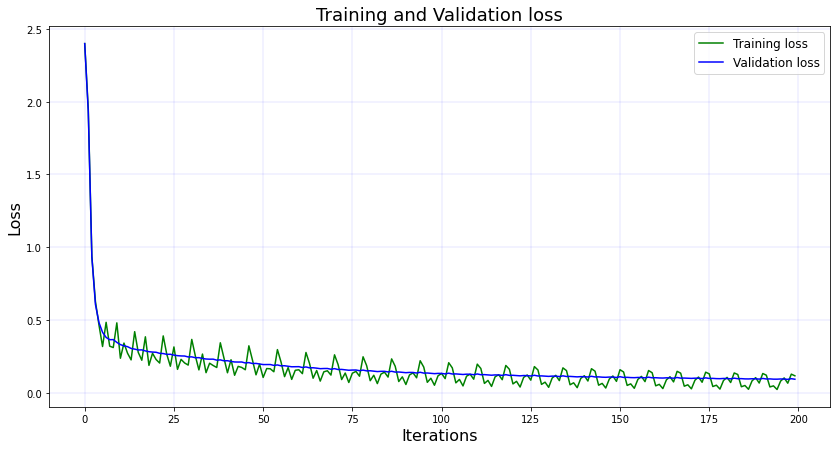

In [10]:
plt.figure(figsize = (14, 7))
plt.plot(model.train_loss, color = 'green', label='Training loss')
plt.plot(model.valid_loss, color = 'blue', label='Validation loss')
plt.title('Training and Validation loss', fontsize=18)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(fontsize=12)
plt.grid(color='blue', linestyle='-', linewidth=0.1)
plt.show()

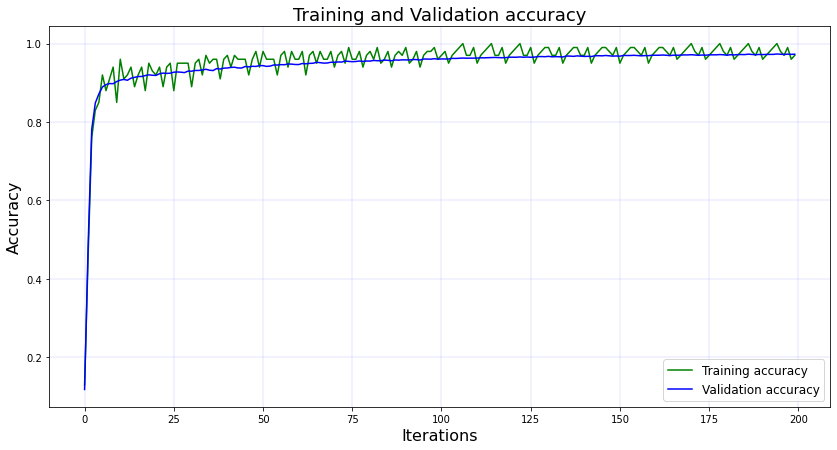

In [11]:
plt.figure(figsize = (14, 7))
plt.plot(model.train_accuracy, color = 'green', label='Training accuracy')
plt.plot(model.valid_accuracy, color = 'blue', label='Validation accuracy')
plt.title('Training and Validation accuracy', fontsize=18)
plt.xlabel('Iterations', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(fontsize=12)
plt.grid(color='blue', linestyle='-', linewidth=0.1)
plt.show()

To make our model predict some random digits we created the list of labels.

In [12]:
labels = {
    0: 'zero',
    1: 'one',
    2: 'two',
    3: 'three',
    4: 'four',
    5: 'five',
    6: 'six',
    7: 'seven',
    8: 'eight',
    9: 'nine',
    10: 'none'
}

In [13]:
confidences = model.predict(X_test[:20])

In [14]:
predictions = model.output_layer_activation.predictions(confidences)

In [15]:
for prediction in predictions:
    print(labels[prediction])

eight
none
four
none
none
six
seven
four
four
seven
eight
one
eight
two
none
six
eight
nine
seven
two


Summarizing, we just made the neural network with couple of layers, Nesterov optimizer, and it seems like it works.